# Problem Statement :Twitter Sentiment Analysis in Python

Group Members : 
  
   ↣ Rutvik Solanki (17070122066)

   ↣ Yagnik bhargav (17070122077)

  ↣ Zainuddin Saiyed (17070122079)


### We have manually fetched all the tweets using the tweepy library in python for all the user's on the topic of "Fake Allegations towards a 4.7 start rating delivery guy of Zomato by a Female Model actress" .

### We have collected all the tweets since the day this incident had occurred which is : 8 March 2021. 

### And we have then performed real time analysis on this topic for all the tweets from the date : 17 March 2021. on our web application implemented in falsk real time.

Approach : 
1. Collect and Create Twitter Dataset
2. Label Dataset
3. Preprocess Dataset (Remove Hashtags, Contractions, Colloquials,etc.)
4. Train Model using pretrained Tensorflow model - Universal Sentence Encoder (Transfer Learning)
5. Realtime Sentiment Analysis on Twitter using trained model


In [2]:
import pandas as pd
df= pd.read_csv('zomato_polarity_all.csv')

In [3]:
!pip install emoji
!pip install unidecode
!pip install wordcloud
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 133kB 7.8MB/s 
     |████████████████████████████████| 245kB 7.2MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
import pandas as pd
import numpy as np
import emoji
import re     
import string
from nltk.corpus import stopwords
import unidecode
colloquials = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My Ass Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The Ass
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""
simple_contractions = {
    re.compile(r"\bcan'?t\b", re.I | re.U): "cannot",
    re.compile(r"\bcan'?t'?ve\b", re.I | re.U): "cannot have",
    re.compile(r"\b'?cause\b", re.I | re.U): "because",
    re.compile(r"\bcould'?ve\b", re.I | re.U): "could have",
    re.compile(r"\bcouldn'?t\b", re.I | re.U): "could not",
    re.compile(r"\bcouldn'?t'?ve\b", re.I | re.U): "could not have",
    re.compile(r"\bdidn'?t\b", re.I | re.U): "did not",
    re.compile(r"\bdoesn'?t\b", re.I | re.U): "does not",
    re.compile(r"\bdon'?t\b", re.I | re.U): "do not",
    re.compile(r"\bdoin'?\b", re.I | re.U): "doing",
    re.compile(r"\bdunno\b", re.I | re.U): "do not know",
    re.compile(r"\bgimme'?\b", re.I | re.U): "give me",
    re.compile(r"\bgoin'?\b", re.I | re.U): "going",
    re.compile(r"\bgonna'?\b", re.I | re.U): "going to",
    re.compile(r"\bhadn'?t\b", re.I | re.U): "had not",
    re.compile(r"\bhadn'?t'?ve\b", re.I | re.U): "had not have",
    re.compile(r"\bhasn'?t\b", re.I | re.U): "has not",
    re.compile(r"\bhaven'?t\b", re.I | re.U): "have not",
    re.compile(r"\bhe'?d'?ve\b", re.I | re.U): "he would have",
    re.compile(r"\bhow'?d\b", re.I | re.U): "how did",
    re.compile(r"\bhow'?d'?y\b", re.I | re.U): "how do you",
    re.compile(r"\bhow'?ll\b", re.I | re.U): "how will",
    re.compile(r"\bI'?d'?ve\b", re.I | re.U): "I would have",
    # May replace the abbreviation "im" as in Instant Messenger.
    # If this abbreviation is in your data remove the "?"
    re.compile(r"\bI'?m\b", re.I | re.U): "I am",
    re.compile(r"\bI'?ve\b", re.I | re.U): "I have",
    re.compile(r"\bisn'?t\b", re.I | re.U): "is not",
    re.compile(r"\bit'?d'?ve\b", re.I | re.U): "it would have",
    re.compile(r"\bkinda\b", re.I | re.U): "kind of",
    re.compile(r"\blet'?s\b", re.I | re.U): "let us",
    re.compile(r"\bma'?am\b", re.I | re.U): "madam",
    re.compile(r"\bmayn'?t\b", re.I | re.U): "may not",
    re.compile(r"\bmight'?ve\b", re.I | re.U): "might have",
    re.compile(r"\bmightn'?t\b", re.I | re.U): "might not",
    re.compile(r"\bmightn'?t'?ve\b", re.I | re.U): "might not have",
    re.compile(r"\bmust'?ve\b", re.I | re.U): "must have",
    re.compile(r"\bmustn'?t\b", re.I | re.U): "must not",
    re.compile(r"\bmustn'?t'?ve\b", re.I | re.U): "must not have",
    re.compile(r"\bnothin'?\b", re.I | re.U): "nothing",
    re.compile(r"\bneedn'?t\b", re.I | re.U): "need not",
    re.compile(r"\bneedn'?t'?ve\b", re.I | re.U): "need not have",
    re.compile(r"\bo'?clock\b", re.I | re.U): "of the clock",
    re.compile(r"\boughta\b", re.I | re.U): "ought to",
    re.compile(r"\boughtn'?t\b", re.I | re.U): "ought not",
    re.compile(r"\boughtn'?t'?ve\b", re.I | re.U): "ought not have",
    re.compile(r"\bshan'?t\b", re.I | re.U): "shall not",
    re.compile(r"\bsha'?n'?t\b", re.I | re.U): "shall not",
    re.compile(r"\bshan'?t'?ve\b", re.I | re.U): "shall not have",
    re.compile(r"\bshe'?d'?ve\b", re.I | re.U): "she would have",
    re.compile(r"\bshould'?ve\b", re.I | re.U): "should have",
    re.compile(r"\bshouldn'?t\b", re.I | re.U): "should not",
    re.compile(r"\bshouldn'?t'?ve\b", re.I | re.U): "should not have",
    re.compile(r"\bso'?ve\b", re.I | re.U): "so have",
    re.compile(r"\bsomethin'?\b", re.I | re.U): "something",
    re.compile(r"\bthat'?d'?ve\b", re.I | re.U): "that would have",
    re.compile(r"\bthere'?d'?ve\b", re.I | re.U): "there would have",
    re.compile(r"\bthey'?d'?ve\b", re.I | re.U): "they would have",
    re.compile(r"\bthey'?re\b", re.I | re.U): "they are",
    re.compile(r"\bthey'?ve\b", re.I | re.U): "they have",
    re.compile(r"\b'?tis\b", re.I | re.U): "it is",
    re.compile(r"\bto'?ve\b", re.I | re.U): "to have",
    re.compile(r"\bu\b(?!\.)", re.I | re.U): "you",
    re.compile(r"\bwasn'?t\b", re.I | re.U): "was not",
    re.compile(r"\bwanna'?\b", re.I | re.U): "want to",
    re.compile(r"\bwe'?d'?ve\b", re.I | re.U): "we would have",
    re.compile(r"\bwe'll\b", re.I | re.U): "we will",
    re.compile(r"\bwe'?ll'?ve\b", re.I | re.U): "we will have",
    re.compile(r"\bwe're\b", re.I | re.U): "we are",
    re.compile(r"\bwe'?ve\b", re.I | re.U): "we have",
    re.compile(r"\bweren'?t\b", re.I | re.U): "were not",
    re.compile(r"\bwhat'?re\b", re.I | re.U): "what are",
    re.compile(r"\bwhat'?ve\b", re.I | re.U): "what have",
    re.compile(r"\bwhen'?ve\b", re.I | re.U): "when have",
    re.compile(r"\bwhere'?d\b", re.I | re.U): "where did",
    re.compile(r"\bwhere'?ve\b", re.I | re.U): "where have",
    re.compile(r"\bwho'?ve\b", re.I | re.U): "who have",
    re.compile(r"\bwhy'?ve\b", re.I | re.U): "why have",
    re.compile(r"\bwill'?ve\b", re.I | re.U): "will have",
    re.compile(r"\bwon'?t\b", re.I | re.U): "will not",
    re.compile(r"\bwon'?t'?ve\b", re.I | re.U): "will not have",
    re.compile(r"\bwould'?ve\b", re.I | re.U): "would have",
    re.compile(r"\bwouldn'?t\b", re.I | re.U): "would not",
    re.compile(r"\bwouldn'?t'?ve\b", re.I | re.U): "would not have",
    re.compile(r"\by'?all\b", re.I | re.U): "you all",
    re.compile(r"\by'?all'?d\b", re.I | re.U): "you all would",
    re.compile(r"\by'?all'?d'?ve\b", re.I | re.U): "you all would have",
    re.compile(r"\by'?all'?re\b", re.I | re.U): "you all are",
    re.compile(r"\by'?all'?ve\b", re.I | re.U): "you all have",
    re.compile(r"\byou'?d'?ve\b", re.I | re.U): "you would have",
    re.compile(r"\byou'?re\b", re.I | re.U): "you are",
    re.compile(r"\byou'?ve\b", re.I | re.U): "you have"
}

def remove_contractions(text):
    for pattern, rep in simple_contractions.items():
            text = pattern.sub(rep, str(text))
    return text
    
colloquials_map_dict = {}
colloquials_list = []
for line in colloquials.split("\n"):
    if line != "":
        slang = line.split("=")[0]
        slang_meaning = line.split("=")[1]
        colloquials_list.append(slang)
        colloquials_map_dict[slang] = slang_meaning
colloquials_list = set(colloquials_list)

def colloquial_conversion(text):
    chat = []
    for w in text.split():
        if w.upper() in colloquials_list:
            chat.append(colloquials_map_dict[w.upper()])
        else:
            chat.append(w)
    return " ".join(chat)

def preprocessing(text):
    text = re.sub('@[A-Za-z0–9]+', '',str(text)) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text=remove_contractions(text)
    text=colloquial_conversion(text)
    STOPWORDS2REMOVE = set(stopwords.words('english'))
    STOPWORDS2REMOVE.discard("not")
    STOPWORDS2REMOVE.discard("no")
    STOPWORDS2REMOVE.discard("nor")
    text=" ".join([text for text in str(text).split() if text not in STOPWORDS2REMOVE])
    text=text.lower()
    text=emoji.demojize(text)
    text=text.replace(":"," ")
    text=' '.join(text.split())
    text=unidecode.unidecode(text)
    text=text.translate(text.maketrans('', '',string.punctuation ))
    text=re.sub("[0-9]+", "", text)
    text=re.sub("zomatodeliveryboy", "zomato delivery boy", text)
    text=re.sub("mentoo", "men too", text)
    text=re.sub("SupportKamraj", "support kamraj", text)
    text=re.sub("supportzomatoguy", "support zomato guy", text)
    text=re.sub("zomatocase", "zomato case", text)
    text=re.sub("reinstatekamraj", "reinstate kamraj", text)
    return text

In [5]:
df.head()

,text,Tweets,clean,polarity,polarity_afinn
0,RT @vaastavngo: Do you think that the #ZomatoD...,: Do you think that the ZomatoDeliveryBoy was ...,do think zomato delivery boy trapped fake alle...,-0.350000,negative
1,Women Who Accused Zomato Delivery Boy of Assau...,Women Who Accused Zomato Delivery Boy of Assau...,women who accused zomato delivery boy assault ...,0.000000,negative
2,RT @SamalAdrija: Tears welled up after seeing ...,: Tears welled up after seeing him like that.\...,tears welled seeing like that before judging r...,0.000000,negative
3,RT @JUSTINN19953790: #ReinstateKamaraj!\nStand...,19953790: ReinstateKamaraj!\nStand with zomato...,reinstatekamaraj stand zomato zomato delivery...,0.000000,neutral
4,RT @MensDayOutIndia: #HiteshaChandranee has re...,: HiteshaChandranee has reportedly left Bengal...,hiteshachandranee reportedly left bengaluru ac...,0.068182,neutral


In [6]:
sentiment_category = ['positive' if score > 0
else 'negative' if score < 0
else 'neutral'
for score in df.polarity]
df['polarity'] = sentiment_category


In [7]:
df.head()

,text,Tweets,clean,polarity,polarity_afinn
0,RT @vaastavngo: Do you think that the #ZomatoD...,: Do you think that the ZomatoDeliveryBoy was ...,do think zomato delivery boy trapped fake alle...,negative,negative
1,Women Who Accused Zomato Delivery Boy of Assau...,Women Who Accused Zomato Delivery Boy of Assau...,women who accused zomato delivery boy assault ...,neutral,negative
2,RT @SamalAdrija: Tears welled up after seeing ...,: Tears welled up after seeing him like that.\...,tears welled seeing like that before judging r...,neutral,negative
3,RT @JUSTINN19953790: #ReinstateKamaraj!\nStand...,19953790: ReinstateKamaraj!\nStand with zomato...,reinstatekamaraj stand zomato zomato delivery...,neutral,neutral
4,RT @MensDayOutIndia: #HiteshaChandranee has re...,: HiteshaChandranee has reportedly left Bengal...,hiteshachandranee reportedly left bengaluru ac...,positive,neutral


In [8]:
df.polarity.value_counts()

neutral     1514
negative    1142
positive     886
Name: polarity, dtype: int64

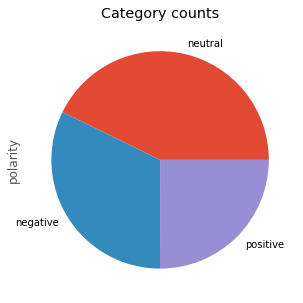

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
df.polarity.value_counts().plot(kind='pie');
plt.title('Category counts');

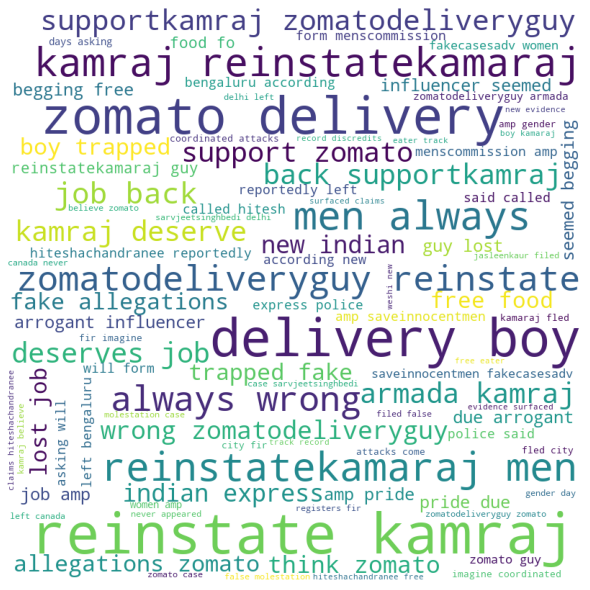

In [11]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df.clean: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

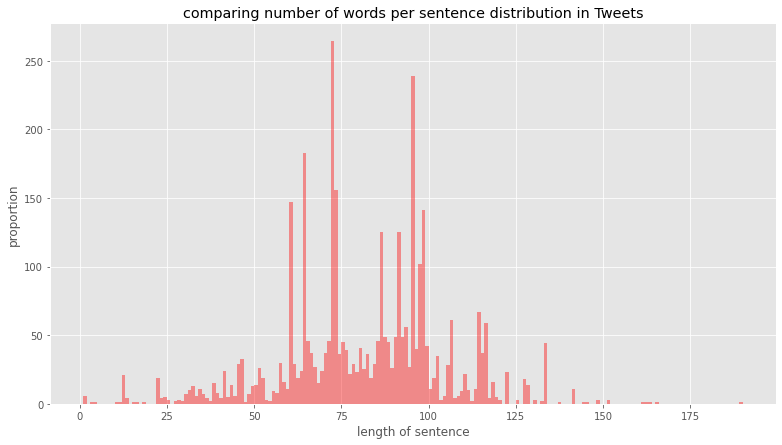

In [30]:

tr_sent_len = [len(i) for i in df.clean.values if i!=0]
plt.figure(figsize=(13,7))
plt.hist(tr_sent_len, bins=range(min(tr_sent_len), max(tr_sent_len) + 1, 1), 
              alpha=0.4, color="red")

plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("comparing number of words per sentence distribution in Tweets")
plt.show()

In [12]:
sentiment_category = [1 if score=='positive'
else -1 if score=='negative'
else 0
for score in df.polarity]
df['polarity'] = sentiment_category


In [13]:
from sklearn.model_selection import train_test_split
X_data = df.clean.values
Y_data = pd.get_dummies(df['polarity'])
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,test_size=0.2, random_state=42 )

In [14]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import tensorflow_datasets as tfds
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is available


In [15]:
#embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=16,
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 256,970,499
Trainable params: 256,970,499
Non-trainable params: 0
__________________________________________

In [16]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 0s 7ms/step - loss: 0.1201 - accuracy: 0.9450


[0.12008531391620636, 0.9449929594993591]

In [17]:
def get_polarity(pred):
  x = np.argmax(pred[0])
  if x==0:
    return ('negative',pred[0][0])
  elif x==1:
    return ('neutral',pred[0][1])  
  else:
    return ('positive',pred[0][2])

Get prediction by inputing text

In [32]:
s=input("Enter the text you want to classify: ")
get_polarity(model.predict([preprocessing(s)]))

Enter the text you want to classify: i love zomato


('neutral', 0.9992925)

Or we can do realtime using twitter API

In [33]:
search_words = ["#zomatodeliveryboy"]
date_since = "2021-1-1"
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
l=[]
for i in search_words:
    tweets = tweepy.Cursor(api.search,
                  q=i,
                  lang="en",
                  since=date_since).items(5)
    temp=[(tweet.text,get_polarity(model.predict([preprocessing(tweet.text)]))) for tweet in tweets]
    l.extend(temp) 

print(l)

[('RT @vaastavngo: Do you think that the #ZomatoDeliveryBoy was trapped in fake allegations?\n#Zomato', ('negative', 0.9999963)), ("RT @ShahDaisy25: Pls stop using social media as a platform to create fake news and publicity... \nIt can destroy someone's life.\nJustice mus…", ('positive', 0.9938553)), ("RT @akasshngupta: #ReinstateKamaraj!\nThe guy lost his job &amp; pride due to an arrogant influencer who seemed to be begging for 'free' food fo…", ('positive', 0.9999894)), ("RT @akasshngupta: #ReinstateKamaraj!\nThe guy lost his job &amp; pride due to an arrogant influencer who seemed to be begging for 'free' food fo…", ('positive', 0.9999894)), ('RT @BlancTurtles: 2021 Best Social Media Strategy to Increase  Followers in few days.  Learn from PRO \n.\n.\nDont forget to share with others…', ('positive', 0.98824793))]


# Conclusion:
We have learned in detail about how to use Tweepy API accessing using Twitter credentials performing a specific keyword search, specified from a date range.

We also have learnt how to implement a Flask Web Application for performing sentiment classification on real time tweets.

We also have learned how use Transfer learning techniques for training a Neural Network Model using Tensorflow and Keras library.

Technologies Learnt :

- TensorFlow - Keras
- NLTK
- Flask
- Tweepy
- Matplotlib
- WordCloud
- Scikit Learn
- Pandas
- Numpy